#### Audio Classification Data Preprocessing

In [1]:
pip install librosa 

Note: you may need to restart the kernel to use updated packages.


In [7]:
### Let's read a sample audio using librosa

import librosa
audio_file_path='//home//pratik//Desktop//UrbanSound8K//dog_bark.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


In [8]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00792928 -0.00775586
 -0.00803613]


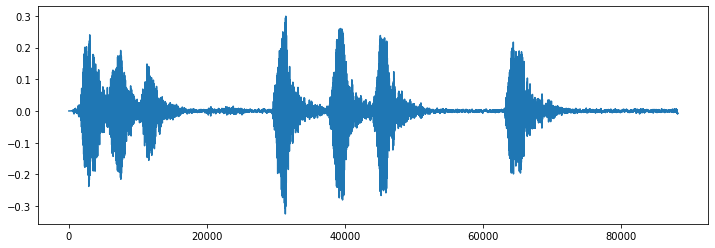

In [9]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [10]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [11]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], dtype=int16)

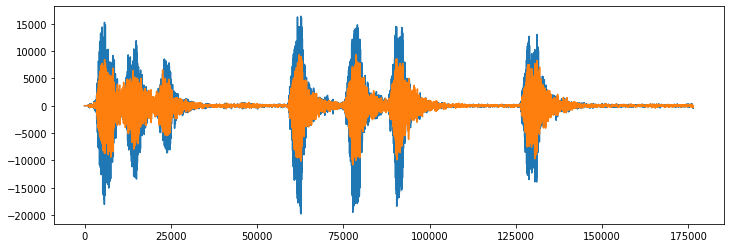

In [12]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [13]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [14]:
mfccs

array([[-5.6096869e+02, -5.0580978e+02, -4.4661014e+02, ...,
        -4.8128598e+02, -4.7259018e+02, -4.6432944e+02],
       [ 4.2651779e+01,  9.3758728e+01,  1.4270894e+02, ...,
         1.0403226e+02,  1.1534014e+02,  1.2226358e+02],
       [ 3.0335106e+01,  3.4996788e+01,  4.0650410e+01, ...,
         1.1899883e+01,  1.8042919e+01,  1.8030758e+01],
       ...,
       [ 1.1695778e+00,  2.7261071e+00, -2.6107359e+00, ...,
        -2.7341042e+00, -2.2597551e+00,  1.5894246e+00],
       [-2.0914640e+00, -2.1207099e+00, -9.1924059e-01, ...,
        -1.2278633e+00, -1.9438729e+00,  2.7554431e+00],
       [-2.3697097e+00, -2.9027920e+00,  2.7277592e-01, ...,
        -1.3872174e+00, -2.8614631e+00,  3.3593225e-01]], dtype=float32)

In [59]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=
metadata=pd.read_csv('//home//pratik//Desktop
)
metadata.head()

,fname,labels
0,0006ae4e.wav,Bark
1,0019ef41.wav,Raindrop
2,001ec0ad.wav,Finger_snapping
3,0026c7cb.wav,Run
4,0026f116.wav,Finger_snapping


In [55]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [62]:
!pip install tqdm
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["fname"]))
    final_class_labels=row["labels"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

4970it [23:26,  3.53it/s]


In [63]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','labels'])
extracted_features_df.head()

,feature,labels
0,"[-453.7976, 162.72307, 2.6030183, 3.9901276, -...",Bark
1,"[-638.8323, 80.006424, 18.729494, 51.929596, 9...",Raindrop
2,"[-737.7109, 30.060478, 11.024119, 11.34007, 1....",Finger_snapping
3,"[-387.2343, 85.65996, -2.8600616, 18.066645, -...",Run
4,"[-712.6923, 5.8181663, -3.5076437, 4.864833, 4...",Finger_snapping


In [64]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['labels'].tolist())

In [30]:
X.shape

(8732, 40)

In [65]:
y

array(['Bark', 'Raindrop', 'Finger_snapping', ..., 'Bus',
       'Electric_guitar', 'Meow'], dtype='<U87')

In [32]:
pip install --upgrade tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=b8383d54f50ea1bed42a56073814e0a0f3d52817d0e0fb60f43e99a108a85cdd
  Stored in directory: c:\users\laptop\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=66dcfdd3a42fd4e65bef3f9fcba8542f56e47d5e172bcefd1cde49d2c5b5c98f
  Stored in directory: c:\users\laptop\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.1

ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: astroid 2.3.3 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: astroid 2.3.3 has requirement wrapt==1.11.*, but you'll have wrapt 1.12.1 which is incompatible.


In [66]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [67]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
X_train

array([[-5.7303766e+02,  6.0795921e+01, -1.1843763e+01, ...,
         1.4681212e+00,  1.2443150e+00,  3.4441507e-01],
       [-4.6224606e+02,  2.9871761e+01,  6.6033888e+00, ...,
        -1.9360162e-01,  1.1359508e-01,  2.5468140e+00],
       [-3.1505804e+02,  7.7575096e+01,  3.3244682e+01, ...,
        -2.0116990e+00, -3.0628953e+00, -1.1990908e+00],
       ...,
       [-4.3000648e+01,  5.7870811e+01, -2.7499269e+01, ...,
         2.1006968e+00, -1.3282578e+00,  1.8658497e+00],
       [-5.4343616e+02,  7.2157463e+01, -3.9566665e+00, ...,
        -8.9035493e-01, -3.3504848e+00, -1.3270109e+00],
       [-1.6268649e+02, -2.8030338e+01, -3.2142719e+01, ...,
        -8.4638917e-01, -3.2052824e-01,  2.6570618e+00]], dtype=float32)

In [70]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
X_train.shape

(3976, 40)

In [72]:
X_test.shape

(994, 40)

In [73]:
y_train.shape

(3976, 213)

In [74]:
y_test.shape

(994, 213)

### Model Creation

In [75]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [77]:
### No of classes
num_labels=y.shape[1]

In [78]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [80]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [81]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
125/125 [==============================] - 10s 16ms/step - loss: 20.0275 - accuracy: 0.0063 - val_loss: 5.3165 - val_accuracy: 0.0101

Epoch 00001: val_loss improved from inf to 5.31648, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
125/125 [==============================] - 1s 8ms/step - loss: 5.6855 - accuracy: 0.0131 - val_loss: 5.2550 - val_accuracy: 0.0111

Epoch 00002: val_loss improved from 5.31648 to 5.25496, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
125/125 [==============================] - 1s 9ms/step - loss: 5.3530 - accuracy: 0.0116 - val_loss: 5.1958 - val_accuracy: 0.0111

Epoch 00003: val_loss improved from 5.25496 to 5.19576, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
125/125 [==============================] - 1s 8ms/step - loss: 5.2424 - accuracy: 0.0171 - val_loss: 5.1412 - val_accuracy: 0.0111

Epoch 00004: val_loss improved from 5.19576 to 5.14125, saving model to saved_models\audio_c

125/125 [==============================] - 1s 7ms/step - loss: 4.4043 - accuracy: 0.0488 - val_loss: 4.4553 - val_accuracy: 0.0332

Epoch 00068: val_loss improved from 4.46366 to 4.45533, saving model to saved_models\audio_classification.hdf5
Epoch 69/100
125/125 [==============================] - 1s 7ms/step - loss: 4.3874 - accuracy: 0.0480 - val_loss: 4.4585 - val_accuracy: 0.0312

Epoch 00069: val_loss did not improve from 4.45533
Epoch 70/100
125/125 [==============================] - 1s 8ms/step - loss: 4.3967 - accuracy: 0.0470 - val_loss: 4.4230 - val_accuracy: 0.0332

Epoch 00070: val_loss improved from 4.45533 to 4.42297, saving model to saved_models\audio_classification.hdf5
Epoch 71/100
125/125 [==============================] - 1s 8ms/step - loss: 4.3890 - accuracy: 0.0498 - val_loss: 4.4290 - val_accuracy: 0.0332

Epoch 00071: val_loss did not improve from 4.42297
Epoch 72/100
125/125 [==============================] - 1s 8ms/step - loss: 4.3979 - accuracy: 0.0470 - val_l

In [82]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.057344064116477966


In [83]:
X_test[1]

array([-3.8631888e+02,  1.1394091e+02,  2.2778954e+01,  2.7213106e+01,
        3.4477303e+00,  1.4580877e+01, -3.0526619e+00,  7.8149886e+00,
       -7.4324431e+00,  3.6237550e+00, -1.1003078e+01, -2.4783158e+00,
       -9.6370316e+00, -1.5010778e+00, -9.8639202e+00, -1.4472517e-02,
       -5.6217299e+00,  8.8126719e-01, -2.9071529e+00,  5.0602169e+00,
       -3.3164763e+00, -3.3738260e+00, -2.8611739e+00, -1.1423888e+00,
       -9.3261927e-01,  9.3082213e-01, -3.3720849e+00, -1.7259069e-01,
        5.1868933e-01,  6.6651732e-01,  1.1526679e+00, -1.7310987e+00,
       -8.8329053e-01, -9.8791462e-01, -2.4830294e+00, -2.3493130e+00,
        2.7852076e-01, -1.6887509e+00, -2.3718011e+00, -8.0870664e-01],
      dtype=float32)

In [84]:
model.predict_classes(X_test)

C:\Users\Laptop\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 50,  14, 154, 164,  14,  14,  14,  14,  14,  14,  14,  14,  83,
        14,   3,  14,  45, 164,  14,  14, 164,  14,  14,  14, 142,  14,
       106, 164, 117,  14,  14, 164,  32,  14, 207,  14,  14,  14,  14,
        14, 207,  14,  14,  14,  14,  14,  14,  14,  32,   3,  45,  20,
       207,  14,  14,  14,  20,  14,  45,  14,  14,  50,  83,  14,  14,
       124,  14,  14,  14,  45,  14,  38,  14,  14,  14,  14, 164,  14,
       180,  14,  45,  50,  14,  30,  14,  14,  14, 106,  83,  14,  50,
        14,  14,  14,  14, 164,  14,  14, 164,  32,  14,  14,  14, 106,
        14,  14,  14,  14,  14,  14,  50, 164, 139, 120,  45,  14, 106,
        14,  14,  20,  14,  45,  14,  30,  14,  14,  14,  14,  14,  14,
        14,  14,  14, 164, 164,  14,  14,  14,  14,  14,  14, 117,  14,
        14,  14,  14,  14, 164,  14,  14,   3,  14,  14,  14,  14,  14,
        32,  14, 164,  14, 207,  14,  14, 154,  14,  14,  20,  14,  14,
        14,  14,  14,  50,  20,  14,  14,  14,  14,  14, 164,  1

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [86]:

filename="C:\\Users\\Laptop\\Downloads\\UrbanSound8K\\dog.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class


[-2.9296814e+02  1.2391682e+02 -1.8529112e+01 -1.8954836e+01
 -3.5278355e+01 -4.6438189e+00 -3.3969311e+01 -1.4433401e+01
 -1.1227983e+01  2.4050300e+00 -2.6364820e+00 -5.0397472e+00
 -1.0891813e+01  6.3180178e-01  5.7777534e+00  3.5287609e+00
 -1.0371912e+00 -5.6258307e+00 -6.2410922e+00 -1.2665101e+00
 -5.5122018e+00 -1.0807478e+01 -8.8814754e+00 -1.5831902e+00
 -2.8123370e-01  1.4680792e+00  3.4335568e+00  1.3397698e+00
  4.9608355e+00  2.7071643e+00 -5.8373487e-01 -1.8241671e+00
  4.1228521e-01  1.5152587e-01 -2.9500377e-01 -8.0371064e-01
 -1.9485896e+00  1.0221021e+00  1.2124017e+00  7.5649929e-01]
[[-2.9296814e+02  1.2391682e+02 -1.8529112e+01 -1.8954836e+01
  -3.5278355e+01 -4.6438189e+00 -3.3969311e+01 -1.4433401e+01
  -1.1227983e+01  2.4050300e+00 -2.6364820e+00 -5.0397472e+00
  -1.0891813e+01  6.3180178e-01  5.7777534e+00  3.5287609e+00
  -1.0371912e+00 -5.6258307e+00 -6.2410922e+00 -1.2665101e+00
  -5.5122018e+00 -1.0807478e+01 -8.8814754e+00 -1.5831902e+00
  -2.8123370e-01 

array(['Bark'], dtype='<U87')